In [36]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import pickle

In [37]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


In [38]:
X_test[0].shape

(350, 260, 3)

In [39]:
model = load_model('melanoma_model_training_end_07_04_2022-18_03_58')

In [40]:
y_pred = model.predict(X_test)

In [41]:
max_f1 = 0

for thresh in range(10, 725):
    y_pred_int = [1 if pred > 1/1000 * thresh else 0 for pred in y_pred]

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import f1_score, precision_score, recall_score

    auc_cnn = roc_auc_score(y_test, y_pred)
    acc_cnn = accuracy_score(y_test, y_pred_int)
    f1_cnn = f1_score(y_test, y_pred_int)
    prec_cnn = precision_score(y_test, y_pred_int)
    recall_cnn = recall_score(y_test, y_pred_int)
    if f1_cnn > max_f1:
        max_f1 = f1_cnn
        best = 1 /1000 * thresh

y_pred_int = [1 if pred > best else 0 for pred in y_pred]

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score

auc_cnn = roc_auc_score(y_test, y_pred)
acc_cnn = accuracy_score(y_test, y_pred_int)
f1_cnn = f1_score(y_test, y_pred_int)
prec_cnn = precision_score(y_test, y_pred_int)
recall_cnn = recall_score(y_test, y_pred_int)

In [42]:
max_f1

0.5454545454545454

In [43]:
f1_cnn

0.5454545454545454

In [44]:
auc_cnn

0.8171897435897436

In [45]:
acc_cnn

0.75

In [46]:
print(f'Prec: {prec_cnn}\nRecall: {recall_cnn} \nf1: {f1_cnn}')

Prec: 0.41379310344827586
Recall: 0.8 
f1: 0.5454545454545454


In [47]:
print(best)

0.504


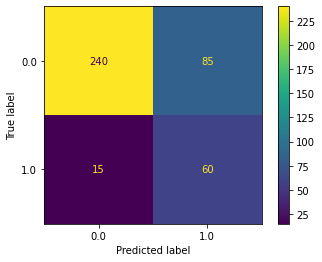

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_int)